In [32]:
import yaml
import numpy as np
import pandas as pd
import seaborn as sns
from sodapy import Socrata

In [2]:
with open("credentials.yml", "r") as cred:
    res = yaml.safe_load(cred)

In [3]:
token = res['api_token']

In [16]:
client = Socrata("data.calgary.ca", token)

In [17]:
result = client.get_all("qdxh-qngy")

In [18]:
data = []

In [19]:
for line in result:
        data.append(line)

In [20]:
df = pd.DataFrame(data)

In [33]:
df.to_feather("./data/raw.feather")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93051 entries, 0 to 93050
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   program_name         93051 non-null  object
 1   type_of_program      93051 non-null  object
 2   program_address      93051 non-null  object
 3   program_city         93051 non-null  object
 4   postal_code          92943 non-null  object
 5   phone_number         78265 non-null  object
 6   capacity             93051 non-null  object
 7   inspection_date      84993 non-null  object
 8   inspection_reason    93029 non-null  object
 9   unique_id            93051 non-null  object
 10  non_compliance_name  20000 non-null  object
 11  enforcement_action   19688 non-null  object
 12  remedy_date          17599 non-null  object
dtypes: object(13)
memory usage: 9.2+ MB


In [23]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

In [24]:
df.head()

,program_name,type_of_program,program_address,program_city,postal_code,phone_number,capacity,inspection_date,inspection_reason,unique_id,non_compliance_name,enforcement_action,remedy_date
0,CALGARY KIDS CENTER INC,OUT OF SCHOOL CARE PROGRAM,789 NORTHMOUNT DRIVE NW,CALGARY,T2L0A1,4033540657,20,2018-03-14,FOLLOW UP TO ENFORCEMENT ACTION,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,NaN,NaN,NaN
1,CALGARY KIDS CENTER INC,OUT OF SCHOOL CARE PROGRAM,789 NORTHMOUNT DRIVE NW,CALGARY,T2L0A1,4033540657,20,2018-03-14,FOLLOW UP TO ENFORCEMENT ACTION,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,NaN,NaN,NaN
2,CALGARY KIDS CENTER INC,OUT OF SCHOOL CARE PROGRAM,789 NORTHMOUNT DRIVE NW,CALGARY,T2L0A1,4033540657,20,2018-03-14,FOLLOW UP TO ENFORCEMENT ACTION,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,NaN,NaN,NaN
3,CALGARY KIDS CENTER INC,OUT OF SCHOOL CARE PROGRAM,789 NORTHMOUNT DRIVE NW,CALGARY,T2L0A1,4033540657,20,2018-03-14,FOLLOW UP TO ENFORCEMENT ACTION,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,NaN,NaN,NaN
4,SUMMIT KIDS - NORTH HAVEN,OUT OF SCHOOL CARE PROGRAM,4922 NORTH HAVEN DRIVE NW,CALGARY,T2K2K2,NaN,64,2014-06-23,COMPLAINT INVESTIGATION,64B26F147BDB0E221117FF7A6E226B00-SUMMIT KIDS -...,NaN,NaN,NaN


In [37]:
df.head().T

,0,1,2,3,4
program_name,CALGARY KIDS CENTER INC,CALGARY KIDS CENTER INC,CALGARY KIDS CENTER INC,CALGARY KIDS CENTER INC,SUMMIT KIDS - NORTH HAVEN
type_of_program,OUT OF SCHOOL CARE PROGRAM,OUT OF SCHOOL CARE PROGRAM,OUT OF SCHOOL CARE PROGRAM,OUT OF SCHOOL CARE PROGRAM,OUT OF SCHOOL CARE PROGRAM
program_address,789 NORTHMOUNT DRIVE NW,789 NORTHMOUNT DRIVE NW,789 NORTHMOUNT DRIVE NW,789 NORTHMOUNT DRIVE NW,4922 NORTH HAVEN DRIVE NW
program_city,CALGARY,CALGARY,CALGARY,CALGARY,CALGARY
postal_code,T2L0A1,T2L0A1,T2L0A1,T2L0A1,T2K2K2
phone_number,4033540657,4033540657,4033540657,4033540657,NaN
capacity,20,20,20,20,64
inspection_date,2018-03-14 00:00:00,2018-03-14 00:00:00,2018-03-14 00:00:00,2018-03-14 00:00:00,2014-06-23 00:00:00
inspection_reason,FOLLOW UP TO ENFORCEMENT ACTION,FOLLOW UP TO ENFORCEMENT ACTION,FOLLOW UP TO ENFORCEMENT ACTION,FOLLOW UP TO ENFORCEMENT ACTION,COMPLAINT INVESTIGATION
unique_id,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,64B26F147BDB0E221117FF7A6E226B00-SUMMIT KIDS -...


In [25]:
df.describe()

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_331444\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,program_name,type_of_program,program_address,program_city,postal_code,phone_number,capacity,inspection_date,inspection_reason,unique_id,non_compliance_name,enforcement_action,remedy_date
count,93051,93051,93051,93051,92943,78265,93051,84993,93029,93051,20000,19688,17599
unique,1065,7,1818,1,732,1037,185,1783,15,13618,256,9,1198
top,FLEDGLINGS EDUCARE CENTRE,DAY CARE PROGRAM,"#4, 1110 CANTERBURY DRIVE SW",CALGARY,T2Z3V8,4034531242,24,2018-11-15 00:00:00,INSPECTION,A4CCD6320D8EC3393918F9A745728835-ACORNS TO OAK...,2(1) - Day Care Program - program in keeping w...,ORDER TO REMEDY,2015-07-14T00:00:00.000
freq,716,36402,709,93051,975,658,5638,204,40861,114,1698,17323,95
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN


In [26]:
for c in df.columns:
    dist = len(df[c].unique())
    print(f"Distinct values for {c}: {dist}")
    if dist <20:
        print("Top 10:")
        print(df[c].value_counts())
    print("\n")

Distinct values for program_name: 1065


Distinct values for type_of_program: 7
Top 10:
DAY CARE PROGRAM                   36402
OUT OF SCHOOL CARE PROGRAM         35175
PRE-SCHOOL PROGRAM                 14927
FACILITY-BASED PROGRAM              4731
FAMILY DAY HOME                      764
GROUP FAMILY CHILD CARE PROGRAM      562
INNOVATIVE CHILD CARE PROGRAM        490
Name: type_of_program, dtype: int64


Distinct values for program_address: 1818


Distinct values for program_city: 1
Top 10:
CALGARY    93051
Name: program_city, dtype: int64


Distinct values for postal_code: 733


Distinct values for phone_number: 1038


Distinct values for capacity: 185


Distinct values for inspection_date: 1784


Distinct values for inspection_reason: 16
Top 10:
INSPECTION                         40861
FOLLOW UP TO ENFORCEMENT ACTION    16458
RENEWAL LICENCE INSPECTION          9044
COMPLAINT INVESTIGATION             7910
INCIDENT REPORT                     5199
CONSULTATION                    

In [29]:
df_inspections = df.groupby(['unique_id']).inspection_reason.nunique()

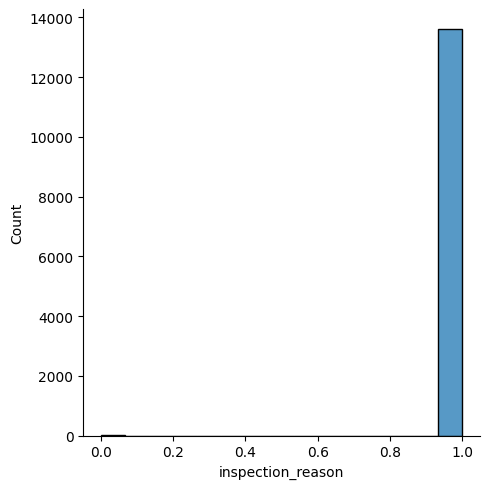

In [35]:
sns.displot(df_inspections)

## Clean data

In [39]:
df_clean = df.drop_duplicates()

In [53]:
df_clean

,program_name,type_of_program,program_address,program_city,postal_code,phone_number,capacity,inspection_date,inspection_reason,unique_id,non_compliance_name,enforcement_action,remedy_date
0,CALGARY KIDS CENTER INC,OUT OF SCHOOL CARE PROGRAM,789 NORTHMOUNT DRIVE NW,CALGARY,T2L0A1,4033540657,20,2018-03-14,FOLLOW UP TO ENFORCEMENT ACTION,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,NaN,NaN,NaN
4,SUMMIT KIDS - NORTH HAVEN,OUT OF SCHOOL CARE PROGRAM,4922 NORTH HAVEN DRIVE NW,CALGARY,T2K2K2,NaN,64,2014-06-23,COMPLAINT INVESTIGATION,64B26F147BDB0E221117FF7A6E226B00-SUMMIT KIDS -...,NaN,NaN,NaN
5,WHITEFIELD DAYCARE AND AFTER SCHOOL,DAY CARE PROGRAM,3644 - 39 STREET NE,CALGARY,T1Y5H6,4032804444,56,2019-05-16,INSPECTION,48788F4165A6F00BEE0B83EA17CC4E40-WHITEFIELD DA...,NaN,NaN,NaN
6,FAMILY FIRST CHILD DEVELOPMENT CENTRE,DAY CARE PROGRAM,"100, 525 - 11 AVE SW",CALGARY,T2R0C9,4037949100,88,2019-08-13,RENEWAL LICENCE INSPECTION,7414DAC4D6450C21A0FA2C088D8B99A7-FAMILY FIRST ...,NaN,NaN,NaN
9,HILLHURST SUNNYSIDE DAYCARE/OUT OF SCHOOL CARE,DAY CARE PROGRAM,1320 5 AVE NW,CALGARY,T2N0S2,4032709703,64,2015-04-30,INSPECTION,BEA4F078713F8DC8ED290E33A59B1282-HILLHURST SUN...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93044,JUMP AND LEAP CHILDCARE,DAY CARE PROGRAM,"103, 1817 - 48 STREET SE",CALGARY,T2B1L9,5873491892,27,2019-07-17,INSPECTION,A57E4001EA43978E11081CF2F88D8F8F-JUMP AND LEAP...,25(1)(b) - Core Requirements - one in every 2 ...,ORDER TO REMEDY,2019-07-23T00:00:00.000
93045,BRIGHTPATH BERMUDA,DAY CARE PROGRAM,3 BERMUDA ROAD NW,CALGARY,T3K1G5,4035160486,88,2016-09-28,INSPECTION,BDD73EBCB147B727F2ADA126E11B1095-BRIGHTPATH BE...,23(1)(a) - Administration Records- particulars...,ORDER TO REMEDY,NaN
93046,AL-AMAL PRESCHOOL,FACILITY-BASED PROGRAM,"4, 2611 - 37 AVENUE NE",CALGARY,T1Y5V7,4034662524,36,2021-01-14,INSPECTION,1013NIUH8000VVKV5003IB8988WD1295-AL-AMAL PRESC...,NaN,NaN,NaN
93047,MARLBOROUGH PARK PRESCHOOL,PRE-SCHOOL PROGRAM,6021 MADIGAN DRIVE NE,CALGARY,T2A5G9,4032352996,20,2020-04-06,RENEWAL LICENCE INSPECTION,A304469EAA364F1FD96FD255EC8F2E70-MARLBOROUGH P...,NaN,NaN,NaN


In [44]:
df_clean.groupby(['program_name']).unique_id.nunique()

program_name
1ST CLASS AFTER CLASS                                  4
1ST CLASS AFTER CLASS - DIVINE MERCY                  10
1ST CLASS AFTER CLASS - ELBOW PARK                     1
1ST CLASS AFTER CLASS - FISH CREEK                    11
1ST CLASS AFTER CLASS - SIBYLLA KIDDLE                 2
                                                      ..
YWCA CHILD CARE CENTRE AT BOW VALLEY COLLEGE          14
YWCA SHERIFF KING HOME CHILD SUPPORT PROGRAM           4
YWCA SHERIFF KING HOME THERAPEUTIC CHILD CARE          8
ZEBRA CROSSING ACADEMY                                47
ZEBRA CROSSING MONTESSORI PRESCHOOL & KINDERGARTEN    29
Name: unique_id, Length: 1065, dtype: int64

In [50]:
with pd.option_context('display.max_colwidth', None):
    print(df_clean.loc[df_clean['program_name']=='1ST CLASS AFTER CLASS', ['program_name', 'inspection_reason', 'unique_id']])

                program_name           inspection_reason  \
5422   1ST CLASS AFTER CLASS  RENEWAL LICENCE INSPECTION   
22567  1ST CLASS AFTER CLASS                  INSPECTION   
30133  1ST CLASS AFTER CLASS  RENEWAL LICENCE INSPECTION   
38981  1ST CLASS AFTER CLASS  INITIAL LICENCE INSPECTION   
42052  1ST CLASS AFTER CLASS                  INSPECTION   
50500  1ST CLASS AFTER CLASS                  INSPECTION   
55119  1ST CLASS AFTER CLASS  INITIAL LICENCE INSPECTION   
65123  1ST CLASS AFTER CLASS            VARIANCE REQUEST   
78881  1ST CLASS AFTER CLASS                  INSPECTION   

                                                                                 unique_id  
5422   77AD8CC69096A485B072AC5A5B10F167-1ST CLASS AFTER CLASS-RENEWAL LICENCE INSPECTION--  
22567                  77AD8CC69096A485B072AC5A5B10F167-1ST CLASS AFTER CLASS-INSPECTION--  
30133  77AD8CC69096A485B072AC5A5B10F167-1ST CLASS AFTER CLASS-RENEWAL LICENCE INSPECTION--  
38981  77AD8CC69096A485B072

In [56]:
df_clean['id'] = df_clean['unique_id'].str.split("-", expand=True)[0]

C:\Users\bruno.gonzalez\AppData\Local\Temp\ipykernel_331444\801473530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['id'] = df_clean['unique_id'].str.split("-", expand=True)[0]


In [57]:
df_clean

,program_name,type_of_program,program_address,program_city,postal_code,phone_number,capacity,inspection_date,inspection_reason,unique_id,non_compliance_name,enforcement_action,remedy_date,id
0,CALGARY KIDS CENTER INC,OUT OF SCHOOL CARE PROGRAM,789 NORTHMOUNT DRIVE NW,CALGARY,T2L0A1,4033540657,20,2018-03-14,FOLLOW UP TO ENFORCEMENT ACTION,C0F7B92FBBC7014ED1D8907373D98B6A-CALGARY KIDS ...,NaN,NaN,NaN,C0F7B92FBBC7014ED1D8907373D98B6A
4,SUMMIT KIDS - NORTH HAVEN,OUT OF SCHOOL CARE PROGRAM,4922 NORTH HAVEN DRIVE NW,CALGARY,T2K2K2,NaN,64,2014-06-23,COMPLAINT INVESTIGATION,64B26F147BDB0E221117FF7A6E226B00-SUMMIT KIDS -...,NaN,NaN,NaN,64B26F147BDB0E221117FF7A6E226B00
5,WHITEFIELD DAYCARE AND AFTER SCHOOL,DAY CARE PROGRAM,3644 - 39 STREET NE,CALGARY,T1Y5H6,4032804444,56,2019-05-16,INSPECTION,48788F4165A6F00BEE0B83EA17CC4E40-WHITEFIELD DA...,NaN,NaN,NaN,48788F4165A6F00BEE0B83EA17CC4E40
6,FAMILY FIRST CHILD DEVELOPMENT CENTRE,DAY CARE PROGRAM,"100, 525 - 11 AVE SW",CALGARY,T2R0C9,4037949100,88,2019-08-13,RENEWAL LICENCE INSPECTION,7414DAC4D6450C21A0FA2C088D8B99A7-FAMILY FIRST ...,NaN,NaN,NaN,7414DAC4D6450C21A0FA2C088D8B99A7
9,HILLHURST SUNNYSIDE DAYCARE/OUT OF SCHOOL CARE,DAY CARE PROGRAM,1320 5 AVE NW,CALGARY,T2N0S2,4032709703,64,2015-04-30,INSPECTION,BEA4F078713F8DC8ED290E33A59B1282-HILLHURST SUN...,NaN,NaN,NaN,BEA4F078713F8DC8ED290E33A59B1282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93044,JUMP AND LEAP CHILDCARE,DAY CARE PROGRAM,"103, 1817 - 48 STREET SE",CALGARY,T2B1L9,5873491892,27,2019-07-17,INSPECTION,A57E4001EA43978E11081CF2F88D8F8F-JUMP AND LEAP...,25(1)(b) - Core Requirements - one in every 2 ...,ORDER TO REMEDY,2019-07-23T00:00:00.000,A57E4001EA43978E11081CF2F88D8F8F
93045,BRIGHTPATH BERMUDA,DAY CARE PROGRAM,3 BERMUDA ROAD NW,CALGARY,T3K1G5,4035160486,88,2016-09-28,INSPECTION,BDD73EBCB147B727F2ADA126E11B1095-BRIGHTPATH BE...,23(1)(a) - Administration Records- particulars...,ORDER TO REMEDY,NaN,BDD73EBCB147B727F2ADA126E11B1095
93046,AL-AMAL PRESCHOOL,FACILITY-BASED PROGRAM,"4, 2611 - 37 AVENUE NE",CALGARY,T1Y5V7,4034662524,36,2021-01-14,INSPECTION,1013NIUH8000VVKV5003IB8988WD1295-AL-AMAL PRESC...,NaN,NaN,NaN,1013NIUH8000VVKV5003IB8988WD1295
93047,MARLBOROUGH PARK PRESCHOOL,PRE-SCHOOL PROGRAM,6021 MADIGAN DRIVE NE,CALGARY,T2A5G9,4032352996,20,2020-04-06,RENEWAL LICENCE INSPECTION,A304469EAA364F1FD96FD255EC8F2E70-MARLBOROUGH P...,NaN,NaN,NaN,A304469EAA364F1FD96FD255EC8F2E70


In [58]:
df_clean.nunique()

program_name            1065
type_of_program            7
program_address         1818
program_city               1
postal_code              732
phone_number            1037
capacity                 185
inspection_date         1783
inspection_reason         15
unique_id              13618
non_compliance_name      256
enforcement_action         9
remedy_date             1198
id                      1754
dtype: int64

In [59]:
df_clean.groupby(['program_name']).id.nunique()

program_name
1ST CLASS AFTER CLASS                                 1
1ST CLASS AFTER CLASS - DIVINE MERCY                  2
1ST CLASS AFTER CLASS - ELBOW PARK                    1
1ST CLASS AFTER CLASS - FISH CREEK                    2
1ST CLASS AFTER CLASS - SIBYLLA KIDDLE                2
                                                     ..
YWCA CHILD CARE CENTRE AT BOW VALLEY COLLEGE          1
YWCA SHERIFF KING HOME CHILD SUPPORT PROGRAM          2
YWCA SHERIFF KING HOME THERAPEUTIC CHILD CARE         1
ZEBRA CROSSING ACADEMY                                5
ZEBRA CROSSING MONTESSORI PRESCHOOL & KINDERGARTEN    2
Name: id, Length: 1065, dtype: int64

In [61]:
with pd.option_context('display.max_colwidth', None):
    print(df_clean.loc[df_clean['program_name']=='1ST CLASS AFTER CLASS - DIVINE MERCY', ['program_name', 'inspection_reason', 'id']])

                               program_name                inspection_reason  \
1553   1ST CLASS AFTER CLASS - DIVINE MERCY                       INSPECTION   
2735   1ST CLASS AFTER CLASS - DIVINE MERCY       RENEWAL LICENCE INSPECTION   
2770   1ST CLASS AFTER CLASS - DIVINE MERCY                       INSPECTION   
3016   1ST CLASS AFTER CLASS - DIVINE MERCY                       INSPECTION   
4567   1ST CLASS AFTER CLASS - DIVINE MERCY                       INSPECTION   
6906   1ST CLASS AFTER CLASS - DIVINE MERCY                       INSPECTION   
16587  1ST CLASS AFTER CLASS - DIVINE MERCY       INITIAL LICENCE INSPECTION   
17501  1ST CLASS AFTER CLASS - DIVINE MERCY                       INSPECTION   
19476  1ST CLASS AFTER CLASS - DIVINE MERCY       INITIAL LICENCE INSPECTION   
19477  1ST CLASS AFTER CLASS - DIVINE MERCY  FOLLOW UP TO ENFORCEMENT ACTION   
20785  1ST CLASS AFTER CLASS - DIVINE MERCY                       INSPECTION   
23475  1ST CLASS AFTER CLASS - DIVINE ME

In [64]:
df_clean = df_clean.drop('unique_id', axis=1)

In [65]:
df_clean

,program_name,type_of_program,program_address,program_city,postal_code,phone_number,capacity,inspection_date,inspection_reason,non_compliance_name,enforcement_action,remedy_date,id
0,CALGARY KIDS CENTER INC,OUT OF SCHOOL CARE PROGRAM,789 NORTHMOUNT DRIVE NW,CALGARY,T2L0A1,4033540657,20,2018-03-14,FOLLOW UP TO ENFORCEMENT ACTION,NaN,NaN,NaN,C0F7B92FBBC7014ED1D8907373D98B6A
4,SUMMIT KIDS - NORTH HAVEN,OUT OF SCHOOL CARE PROGRAM,4922 NORTH HAVEN DRIVE NW,CALGARY,T2K2K2,NaN,64,2014-06-23,COMPLAINT INVESTIGATION,NaN,NaN,NaN,64B26F147BDB0E221117FF7A6E226B00
5,WHITEFIELD DAYCARE AND AFTER SCHOOL,DAY CARE PROGRAM,3644 - 39 STREET NE,CALGARY,T1Y5H6,4032804444,56,2019-05-16,INSPECTION,NaN,NaN,NaN,48788F4165A6F00BEE0B83EA17CC4E40
6,FAMILY FIRST CHILD DEVELOPMENT CENTRE,DAY CARE PROGRAM,"100, 525 - 11 AVE SW",CALGARY,T2R0C9,4037949100,88,2019-08-13,RENEWAL LICENCE INSPECTION,NaN,NaN,NaN,7414DAC4D6450C21A0FA2C088D8B99A7
9,HILLHURST SUNNYSIDE DAYCARE/OUT OF SCHOOL CARE,DAY CARE PROGRAM,1320 5 AVE NW,CALGARY,T2N0S2,4032709703,64,2015-04-30,INSPECTION,NaN,NaN,NaN,BEA4F078713F8DC8ED290E33A59B1282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93044,JUMP AND LEAP CHILDCARE,DAY CARE PROGRAM,"103, 1817 - 48 STREET SE",CALGARY,T2B1L9,5873491892,27,2019-07-17,INSPECTION,25(1)(b) - Core Requirements - one in every 2 ...,ORDER TO REMEDY,2019-07-23T00:00:00.000,A57E4001EA43978E11081CF2F88D8F8F
93045,BRIGHTPATH BERMUDA,DAY CARE PROGRAM,3 BERMUDA ROAD NW,CALGARY,T3K1G5,4035160486,88,2016-09-28,INSPECTION,23(1)(a) - Administration Records- particulars...,ORDER TO REMEDY,NaN,BDD73EBCB147B727F2ADA126E11B1095
93046,AL-AMAL PRESCHOOL,FACILITY-BASED PROGRAM,"4, 2611 - 37 AVENUE NE",CALGARY,T1Y5V7,4034662524,36,2021-01-14,INSPECTION,NaN,NaN,NaN,1013NIUH8000VVKV5003IB8988WD1295
93047,MARLBOROUGH PARK PRESCHOOL,PRE-SCHOOL PROGRAM,6021 MADIGAN DRIVE NE,CALGARY,T2A5G9,4032352996,20,2020-04-06,RENEWAL LICENCE INSPECTION,NaN,NaN,NaN,A304469EAA364F1FD96FD255EC8F2E70
